# Explore here

In [2]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

import os
import shutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings

In [14]:
trdata = r'C:\Users\jesus\Desktop\DEEP_LEARNING\INTRO_TO_DEEP_LEARNING_JesusCastanedam\data\interim\Dogs vs Cats\training'
tsdata = r'C:\Users\jesus\Desktop\DEEP_LEARNING\INTRO_TO_DEEP_LEARNING_JesusCastanedam\data\interim\Dogs vs Cats\test'


In [15]:
print('#Cat Images:', len(os.listdir(r'C:\Users\jesus\Desktop\DEEP_LEARNING\INTRO_TO_DEEP_LEARNING_JesusCastanedam\data\interim\Dogs vs Cats\training\cat')))
print('#Dog Images:', len(os.listdir(r'C:\Users\jesus\Desktop\DEEP_LEARNING\INTRO_TO_DEEP_LEARNING_JesusCastanedam\data\interim\Dogs vs Cats\training\dog')))


#Cat Images: 12500
#Dog Images: 12501


In [17]:
cat_image = keras.utils.load_img(r'C:\Users\jesus\Desktop\DEEP_LEARNING\INTRO_TO_DEEP_LEARNING_JesusCastanedam\data\interim\Dogs vs Cats\training\cat\0.jpg')
dog_image = keras.utils.load_img(r'C:\Users\jesus\Desktop\DEEP_LEARNING\INTRO_TO_DEEP_LEARNING_JesusCastanedam\data\interim\Dogs vs Cats\training\dog\0.jpg')

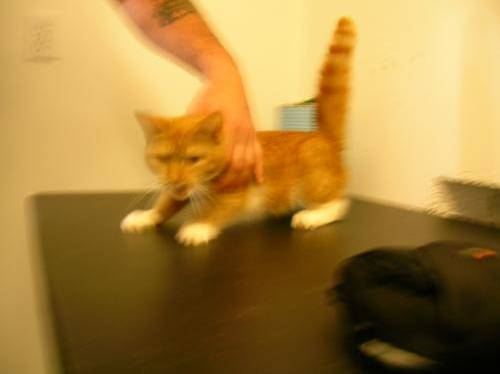

In [18]:
cat_image

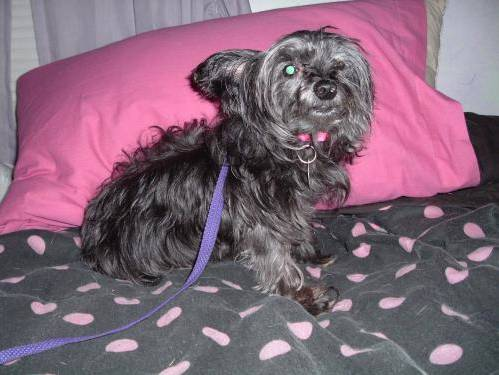

In [19]:
dog_image

In [20]:
training_dataset, validation_dataset = keras.utils.image_dataset_from_directory(
    trdata,
    validation_split=0.2,
    subset="both",
    seed=0,
    batch_size=50,
    image_size=(224, 224)
)

# Cargar dataset de prueba (sin etiquetas)
test_dataset = keras.utils.image_dataset_from_directory(
    tsdata,
    labels=None,
    batch_size=1,
    image_size=(224, 224),
    shuffle=False
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.
Found 12500 files.


In [21]:
training_dataset.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [22]:
training_dataset.cardinality().numpy()

np.int64(400)

In [23]:
normalization_layer = keras.layers.Rescaling(1./255)

training_dataset = training_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x: normalization_layer(x))

In [ ]:
model = Sequential([
    # Bloque 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),

    # Bloque 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),

    # Bloque 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),

    # Clasificación
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')
])

c:\Users\jesus\Desktop\DEEP_LEARNING\INTRO_TO_DEEP_LEARNING_JesusCastanedam\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Compilación y entrenamiento
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(training_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 372s 928ms/step - accuracy: 0.6192 - loss: 0.6533 - val_accuracy: 0.7418 - val_loss: 0.5167
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 349s 873ms/step - accuracy: 0.7583 - loss: 0.4958 - val_accuracy: 0.7702 - val_loss: 0.4802
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.7928 - loss: 0.4382 - val_accuracy: 0.7890 - val_loss: 0.4544
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - accuracy: 0.8205 - loss: 0.3955 - val_accuracy: 0.7764 - val_loss: 0.4950
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 213s 533ms/step - accuracy: 0.8367 - loss: 0.3610 - val_accuracy: 0.7764 - val_loss: 0.4993


In [26]:
# Cell 6: Callbacks
checkpoint_cb = ModelCheckpoint('best_model.keras', save_best_only=True)
earlystop_cb = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, mode='max')


In [27]:
# Cell 7: Entrenamiento
history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[checkpoint_cb, earlystop_cb]
)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 222s 554ms/step - accuracy: 0.8661 - loss: 0.3121 - val_accuracy: 0.7838 - val_loss: 0.5054
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 222s 555ms/step - accuracy: 0.8868 - loss: 0.2721 - val_accuracy: 0.7960 - val_loss: 0.4956
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 235s 586ms/step - accuracy: 0.9081 - loss: 0.2337 - val_accuracy: 0.7976 - val_loss: 0.5115
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 497s 1s/step - accuracy: 0.9273 - loss: 0.1883 - val_accuracy: 0.8044 - val_loss: 0.5318
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 264s 655ms/step - accuracy: 0.9411 - loss: 0.1566 - val_accuracy: 0.7962 - val_loss: 0.5875
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 320s 800ms/step - accuracy: 0.9608 - loss: 0.1156 - val_accuracy: 0.8024 - val_loss: 0.6008
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 234s 584ms/step - accuracy: 0.9742 - loss: 0.0823 - val_accuracy: 0.8068 - val_loss: 0.6459
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 228s 569ms/step - accuracy: 0.9801 - lo

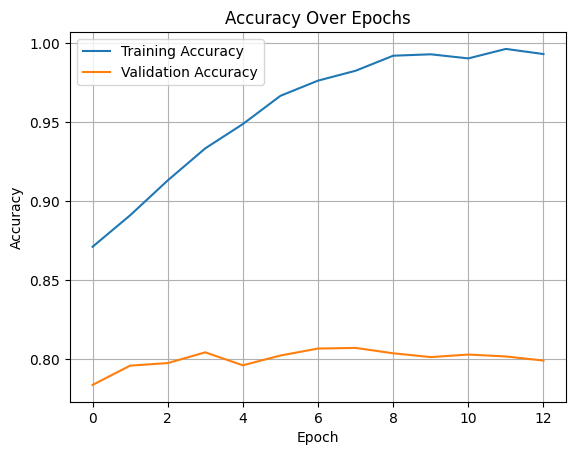

In [28]:
# Cell 8: Visualización de métricas de entrenamiento
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title("Accuracy Over Epochs")
plt.show()


12500/12500 ━━━━━━━━━━━━━━━━━━━━ 88s 7ms/step


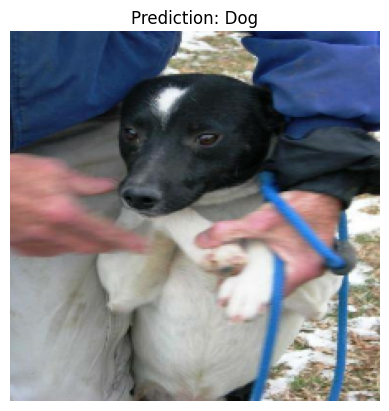

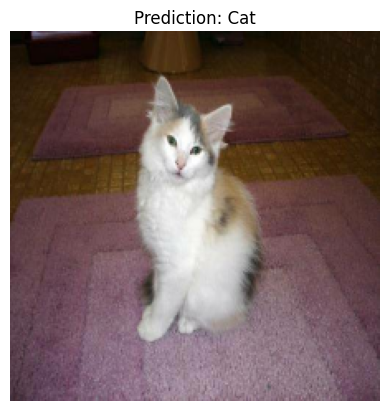

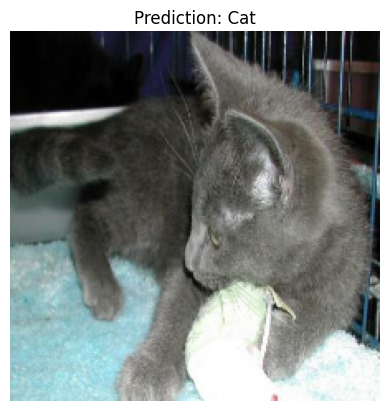

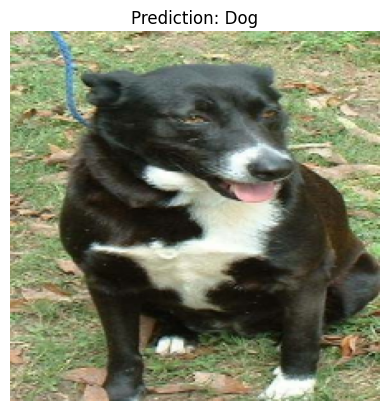

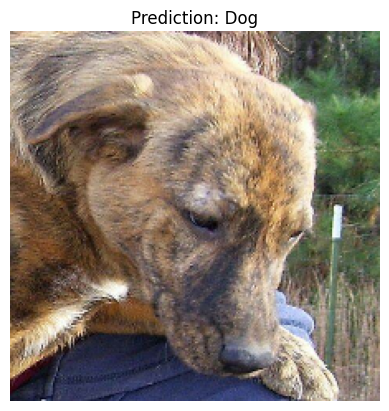

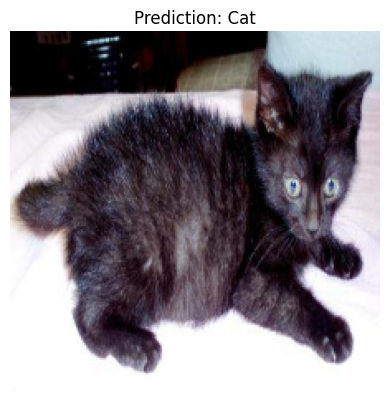

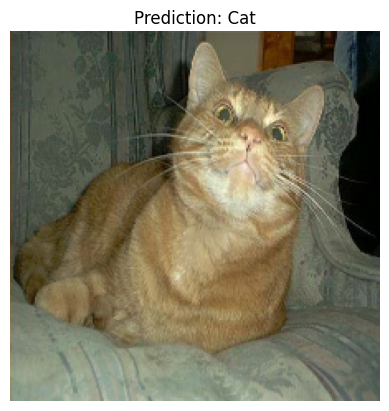

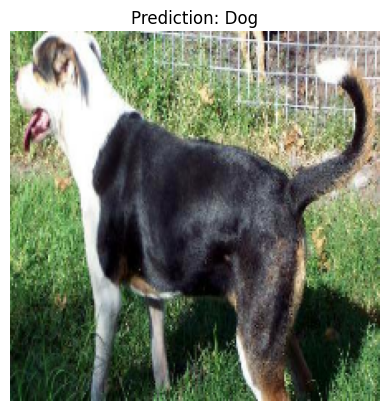

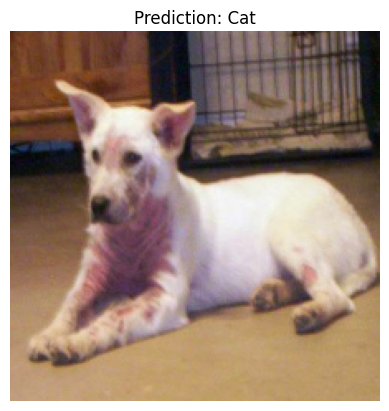

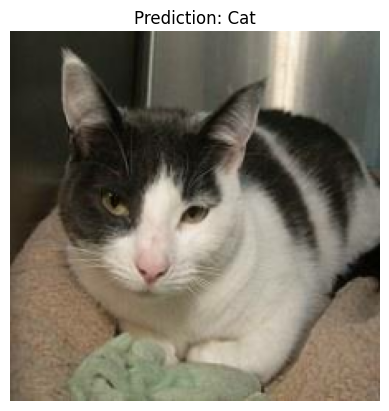

In [39]:
# Cell 9: Predicción en test y visualización
class_names = ['Cat', 'Dog']
predictions = model.predict(test_dataset)

# Mostrar las primeras 5 imágenes con su predicción
for i, image in enumerate(test_dataset.take(10)):
    pred_class = np.argmax(predictions[i])
    plt.imshow(image[0].numpy())
    plt.title(f"Prediction: {class_names[pred_class]}")
    plt.axis('off')
    plt.show()
